## Reading files and concatenating

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [100]:
all_files=[]
all_file_names=[]

In [101]:
for folder,subfolder,files in os.walk('data'):
    for file in files:
        if file=='File left to be added.xlsx':
            all_files.append(pd.read_excel('data/'+file,header=None))
        else:
            all_files.append(pd.read_excel('data/'+file))      
        all_file_names.append(file)

In [234]:
all_files[12]=all_files[12].rename(columns={'Phone 1':'Phone1','Phone 2':'Phone2','Mobile 1':'Mobile1','Mobile 2':'Mobile2'})

In [240]:
files3to12=pd.concat(all_files[3:13])

In [248]:
files3to12_17=pd.concat([files3to12,all_files[17]])

In [255]:
files18to20=pd.concat(all_files[18:21])

In [271]:
all_files[2]=all_files[2].rename(columns={'Add':'Address 1','Pin Code':'Pin'})

In [267]:
files3to12_17=files3to12_17.rename(columns={'Email':'Email1'})

In [272]:
files2to12_17=pd.concat([all_files[2],files3to12_17])

In [293]:
files2to12_17['Contact Name']=files2to12_17['Title'].fillna('')+' '+files2to12_17['First Name'].fillna('')+' '+files2to12_17['Last Name'].fillna('')

In [299]:
del files2to12_17['First Name']

In [300]:
del files2to12_17['Last Name']
del files2to12_17['Title']

In [308]:
del all_files[13][6]

In [310]:
del all_files[13][10]

In [312]:
all_files[13].columns=['Id','Company Name','Address 1','City','State','Pin','Contact Name','Phone1','Designation','Mobile1']

In [315]:
all_files[13].columns

Index([u'Id', u'Company Name', u'Address 1', u'City', u'State', u'Pin',
       u'Contact Name', u'Phone1', u'Designation', u'Mobile1'],
      dtype='object')

In [316]:
files2to13_17=pd.concat([files2to12_17,all_files[13]])

In [331]:
all_files[0]['Company Name']=dict(all_files[0].index).values()

In [333]:
all_files[0]['Id']=dict(all_files[0].index).keys()

In [338]:
all_files[0].index=all_files[0]['Id']-1

In [342]:
all_files[1]['Company Name']=dict(all_files[1].index).values()
all_files[1]['Id']=dict(all_files[1].index).keys()
all_files[1].index=all_files[1]['Id']-1

In [344]:
all_files[14]['Company Name']=dict(all_files[14].index).values()
all_files[14]['Id']=dict(all_files[14].index).keys()
all_files[14].index=all_files[14]['Id']-1

In [352]:
all_files[0]=all_files[0].rename(columns={'Unnamed: 10':'Assigned to'})

In [355]:
files0_1_14=pd.concat([all_files[0],all_files[1],all_files[14]])

In [364]:
all_files[15]=all_files[15].rename(columns={'S. No':'Id'})

In [366]:
files0_1_14_15=pd.concat([files0_1_14,all_files[15]])

In [373]:
del all_files[16]['ch']

In [388]:
all_files[16]=all_files[16].rename(columns={'Add3':'Address 3','Add4':'Address 4','Phone':'Phone1','Email':'Email1','WebSite':'Web','ContactPerson':'Contact Name','BusinessDetails':'Business Details','businesstype':'Business Type'})

In [391]:
files2to13_16_17=pd.concat([files2to13_17,all_files[16]])

In [414]:
files0_1_14_15=files0_1_14_15.rename(columns={'Address':'Address 1','Email Id':'Email1','Fax Number':'Fax',
                                              'Phone Number':'Phone1','State/Province':'State','Website':'Web',
                                              'Zip/postal Code':'Pin','Direct Number':'Mobile1'})

In [404]:
files18to20=files18to20.rename(columns={'Sr. No.':'Id','Address':'Address 1','State/Province':'State','Zip/postal Code':'Pin',
                                       'Phone Number':'Phone1','Fax Number':'Fax','Website':'Web','Direct Number':'Mobile1',
                                       'Email':'Email1'})

In [405]:
files2to13_16to20=pd.concat([files18to20,files2to13_16_17])

In [415]:
files_all=pd.concat([files0_1_14_15,files2to13_16to20])

In [477]:
files_all=files_all.drop_duplicates(subset=['Email1','Company Name'])

In [470]:
files_all=files_all.fillna('')

In [486]:
del files_all['Id']

In [492]:
files_all['State']=files_all['State'].str.lower()

In [494]:
files_all['State']=files_all['State'].str.strip()

In [544]:
files_all['Business Type']=files_all['Business Type'].str.lower()
files_all['Business Type']=files_all['Business Type'].str.lower()

In [545]:
files_all.to_csv('all.csv',encoding='utf-8')

## Performing analytics

### Ideas:
Perform statewise no. of companies and visualise in bar/pie chart

In [583]:
state=files_all.groupby('State').count()['Company Name'].sort_values(ascending=False)

In [592]:
state=state.drop('')

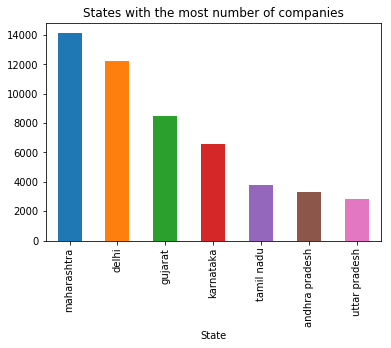

In [594]:
plt.title('States with the most number of companies')
state[0:7].plot(kind='bar')

In [548]:
business_type=files_all.groupby('Business Type').count()['Company Name'].sort_values(ascending=False)

In [549]:
business_type

Business Type
                                                 33051
manufacturer, exporter                           17864
services providers                                8857
dealers                                           5115
importer                                          1388
manufacturer                                      1015
architectures                                      741
exporters                                          190
manufacturers                                      162
service provider                                   155
dealer                                             133
service provider, dealer                           100
manufacturer and exporters                          85
manufacturer & exporters                            79
manufacturer and exporters                          76
manufactures & exporters                            74
distributor                                         60
manufacturer  & exporters                          

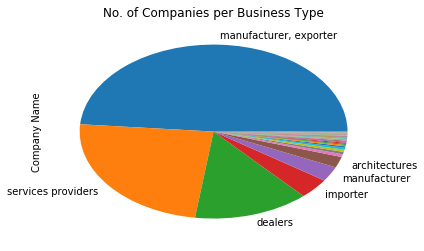

In [582]:
plt.title('No. of Companies per Business Type')
business_type[1:].plot(kind='pie',labels=list(business_type.index[1:7])+['']*len(business_type[7:]))